In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### Basic Informations

In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
data.columns

Index(['Year', 'Price'], dtype='object')

### Checking for null values

In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

### Outlier detection

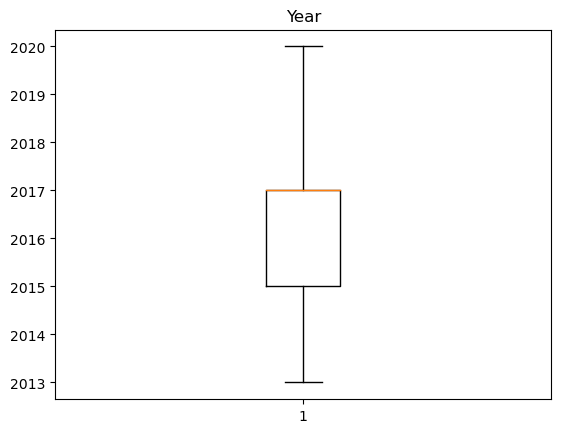

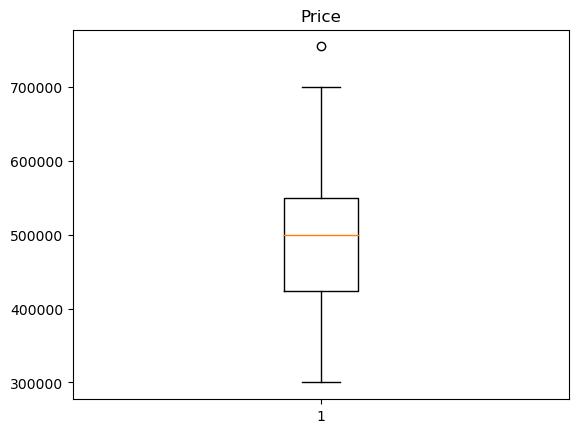

In [9]:
num_cols = ['Year', 'Price']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [10]:
Q1 = data['Price'].quantile(0.25)
Q2 = data['Price'].quantile(0.50)
Q3 = data['Price'].quantile(0.75)
IQR = Q3-Q1
low_lim= Q1-(1.5*IQR)
up_lim= Q3+(1.5*IQR)

In [11]:
outlier= data['Price']> up_lim
data.loc[outlier].index

Int64Index([1], dtype='int64')

####  Outlier filling

In [12]:
data['Price']=np.where(data['Price']>up_lim,up_lim,np.where(data['Price']<low_lim,low_lim,data['Price']))

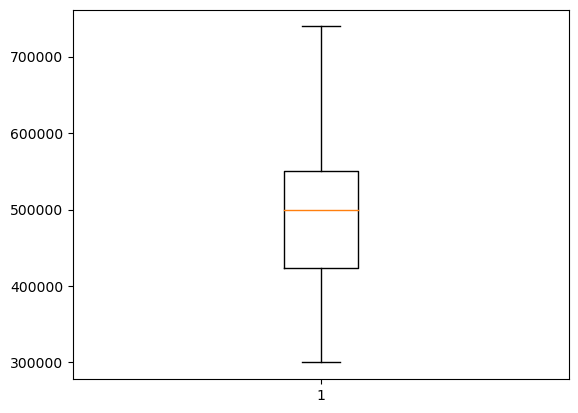

In [13]:
plt.boxplot(data['Price'])
plt.show()

#### correlation matrix

<Axes: >

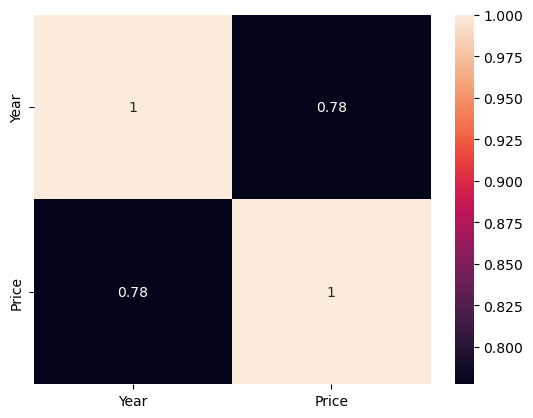

In [14]:
corrmatrix = data.corr()
sns.heatmap(corrmatrix, annot=True)

In [15]:
y = data['Price']  #target
X = data.drop(['Price'], axis=1)   #feature

#### splitting of training and testing dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Linear Regression 

In [19]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [20]:
linear_model = linear_reg.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

### Lasso Regression 

In [21]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)

In [22]:
lasso_model = lasso_reg.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

calculating MSE and r2 values for linear and lasso regression

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
print('MSE for linear regression is',mean_squared_error(y_test, linear_y_pred))
print('MSE for lasso regression is ',mean_squared_error(y_test, lasso_y_pred))
print('r2 score for linear regression is',r2_score(y_test, linear_y_pred))
print('r2 score for lasso regreesion is ',r2_score(y_test, lasso_y_pred))

MSE for linear regression is 1385931437.5032732
MSE for lasso regression is  1385931085.9293396
r2 score for linear regression is 0.83312102827245
r2 score for lasso regreesion is  0.8331210706052055


There is no much difference between linear and lasso regressions. We take linear and lasso regression models for predicting the car price for the year 2022. Both predict approximately same prices.

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
linear_model.predict([[2022]])

array([716302.97381628])

In [31]:
lasso_model.predict([[2022]])

array([716302.74563606])

The predicted price of a second-hand car in 2022 is 716302.

### scatterplot of datapoints

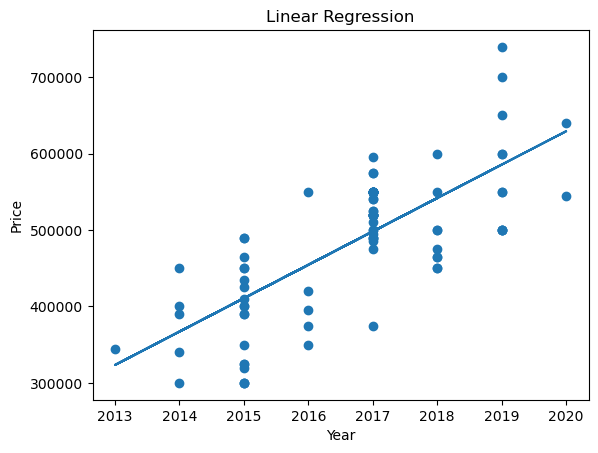

In [27]:
plt.scatter(X_train, y_train)
plt.title('Linear Regression')
plt.plot(X_test,linear_y_pred )
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

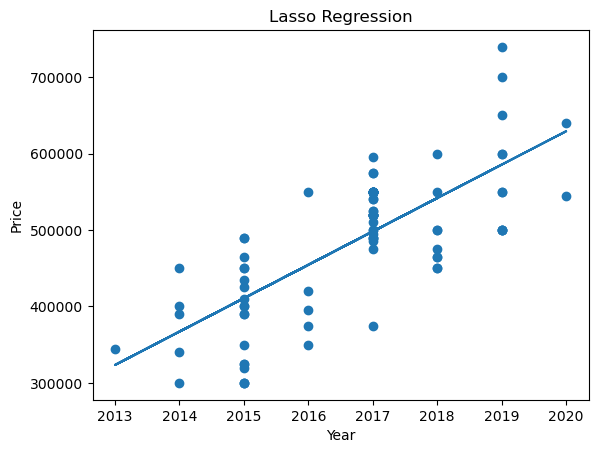

In [28]:
plt.scatter(X_train, y_train)
plt.title('Lasso Regression')
plt.plot(X_test,lasso_y_pred )
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()